# Computation points of one Regular Grid - By Valeria 

### Brief description

This Jupyter notebook is a supplementary material contaning the code needed to generate part of the synthetic data and reproduce part of the figures and results of the manuscript. This code uses the open-source Python toolkit for geophysical modeling and inversion [Fatiando a Terra](http://www.fatiando.org/index.html).

This code creates the horizontal coordinates of the synthetic data that are used in the numerical applications.

**Note:** A Jupyter notebook is a document that incorporates text, results, figures, and the Python source code to produce them. If you are viewing this from the URL https://nbviewer.jupyter.org/, the document will be static (not executable). To run the code, you will need to download the notebook and install all the required dependencies. For installing the Fatiando a Terra and all the required dependencies, please follow the instructions shown in http://www.fatiando.org/install.html.

### Import the required dependencies

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cPickle as pickle
import datetime
from IPython.display import Markdown as md
from IPython.display import display as dp
import string as st

from __future__ import division

import auxiliary_functions as af

import fatiando
from fatiando import gridder
from fatiando.mesher import Prism
from fatiando.gridder import regular
from fatiando.gravmag import prism
from fatiando.vis import myv
from fatiando.utils import ang2vec, contaminate
from fatiando.constants import G

C:\Anaconda2\lib\site-packages\fatiando\vis\mpl.py:70: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")
C:\Anaconda2\lib\site-packages\fatiando\vis\myv.py:53: UserWarning: This module will be removed in v0.7.
  warnings.warn("This module will be removed in v0.7.")


In [2]:
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.major.pad'] = 12
plt.rcParams['ytick.major.pad'] = 12

In [3]:
notebook_name = 'computation_points_one_grid_.ipynb'

In [4]:
print("Version of Fatiando a Terra used: {}".format(fatiando.__version__))

Version of Fatiando a Terra used: ac2afbcb2d99b18f145cc1ed40075beb5f92dd5a


In [5]:
saved_files = [] #list of saved files

### Load the synthetic model formed by a single rectangular prism

In [6]:
with open('..\data\model_single.pickle') as f:
        full_model = pickle.load(f)

### 2D grid of points

#### TWO Regular grids

In [7]:
regular_single_grid = dict() #empty dictionary


In [8]:
#area over which the data are calculated
#x minimum, x maximum, y minimum and y maximum


regular_single_grid ['area'] = [0, 5000, -5000, 5000]


#number of data along the x and y directions

#regular_single_grid['shape'] = (20,40)
regular_single_grid['shape'] = (40,80)


#total number of data
regular_single_grid['N'] = regular_single_grid['shape'][0]*regular_single_grid['shape'][1]

#grid spacing along the y and x directions
regular_single_grid['spacing'] = gridder.spacing(regular_single_grid['area'], regular_single_grid['shape'])

#element of area used in the numerical integration
regular_single_grid['DS'] = regular_single_grid['spacing'][0]*regular_single_grid['spacing'][1]


In [9]:
#auxiliary informations about the grid
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
regular_single_grid['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)


In [10]:
#save the grid model by using the Python pickle module (https://docs.python.org/2/library/pickle.html)
file_name = '..\\data\\regular_single_grid.pickle'
with open(file_name, 'w') as f:
    pickle.dump(regular_single_grid, f)
saved_files.append(file_name)

In [11]:
for r in regular_single_grid:
    print r, ':', regular_single_grid[r]    

area : [0, 5000, -5000, 5000]
spacing : [128.2051282051282, 126.58227848101266]
N : 3200
shape : (40, 80)
DS : 16228.4972412
metadata : Generated by computation_points_one_grid_.ipynb on 10 October 2018 15:21:05 UTC


In [12]:
#coordinates x and y of the data
xr1, yr1 = regular(regular_single_grid['area'], regular_single_grid['shape'])


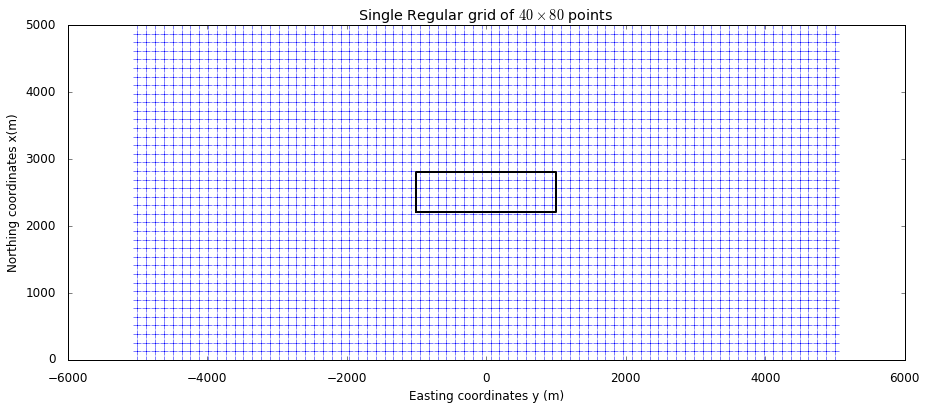

In [13]:
file_name = '..\\figs\\Single_Regular_Grid'
plt.figure(figsize=(15, 6))

ax = plt.gca()
plt.plot(yr1, xr1, 'b+', markersize=8)

plt.title("Single Regular grid of $%d \\times %d$ points " \
%(regular_single_grid['shape'][0], regular_single_grid['shape'][1]))




for i, sq in enumerate(full_model['projection']):
    y1, y2, x1, x2 = sq
    xs = [x1, x1, x2, x2, x1]
    ys = [y1, y2, y2, y1, y1]
    projection_style = '-k'
    ax.plot(xs, ys, projection_style,linewidth = 2.0 )
    
        
plt.xlabel('Easting coordinates y (m)')
plt.ylabel('Northing coordinates x(m)')
plt.savefig(file_name+'.eps', dpi=600)


af.plotmap(xr1, yr1, None, regular_grid1['shape1'], regular_grid1['area1'], 
           color_scheme = None, 
           prism_projection = True, projection_style = '-k', 
           model = full_model['projection'],
           observations=True, point_style='.k', point_size=1)

In [14]:
caption = "Single Regular grid of $%d \\times %d$ points." \
%(regular_single_grid['shape'][0], regular_single_grid['shape'][1])


In [15]:
dp(md(caption))

Single Regular grid of $40 \times 80$ points.

### Saved files

In [16]:
with open('reports\\report_%s.md' % notebook_name[:st.index(notebook_name,'.')], 'w') as f:
    f.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    f.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        f.write('*  `%s` \n' % (sf))

1  ..\data\regular_single_grid.pickle
